# Rideshare Market Analysis

In this demonstration, I will offer data-backed guidance on new opportunities for market differentiation for a fictional Uber competitor.

In the input data folder in this repo lies the company's complete recordset of ~2,400 rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Also in the input data folder is a .csv containing information about each of the 127 cities serviced by the company. For each city, there is information on the number of drivers, as well as the city size.

The objective will be to build a Bubble Plot that showcases the relationship between four key variables:


- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)


In addition, we will produce the following three pie charts:


- % of Total Fares by City Type
- % of Total Rides by City Type
- % of Total Drivers by City Type


As final considerations:


- We will consider aesthetics and proper labelling of plots and pie charts.
- We will stick to the company color scheme (Gold, Light Sky Blue, and Light Coral) in producing the plot and pie charts.

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create dataframes from .csv files
city_csv = pd.read_csv('input_data/city_data.csv')
ride_csv = pd.read_csv('input_data/ride_data.csv')
cities = pd.DataFrame(city_csv)
rides = pd.DataFrame(ride_csv)

## Explore ```.csv```s

In [3]:
cities.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
cities.index

RangeIndex(start=0, stop=126, step=1)

In [5]:
cities.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
rides.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
rides.index

RangeIndex(start=0, stop=2375, step=1)

In [8]:
rides.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Create Summary Dataframe

The first dataframe we have to create is the:
 - average fare ($)
 - total number of rides
 - total number of drivers
 - type

For each city

### Strategy:

The cities data already contains columns with the:
 - Total number of drivers
 - City type
 
The rides data contains the information we will need to calculate the remaining figures:
 - Average fare ($)
 - Total number of rides
 
So, we will use the rides data to create a dataframe with 3 columns:
 - City
 - Average fare
 - Total rides
 
To accomplish this, we grouby city on the rides dataframe:

In [9]:
ridegroup = rides.groupby('city')

Then we call out the column, and the summary method.

To prepare for later join, we turn the returned series into a dataframe, and reset the index.

In [10]:
avfarepercity = pd.DataFrame(ridegroup['fare'].mean()).reset_index()
avfarepercity.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


We will do the same for total number of rides. Any column can be chosen, and the .count() method will return the number of times each city appears in the rides dataframe:


Again, to prepare for later join, we turn the returned series into a dataframe, and reset the index.

In [11]:
ridespercity = pd.DataFrame(ridegroup['fare'].count()).reset_index()
ridespercity.head()

,city,fare
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


Now that we know how to produce the summaries, lets join them to the city dataframe:

In [12]:
first_summary = cities.merge(
    avfarepercity.merge(
        ridespercity,
        on='city', how='outer'), 
    on='city', how='outer')

Let's take a look at the result:

In [13]:
first_summary.head()

,city,driver_count,type,fare_x,fare_y
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


Because of the name collision of 'fare', pandas added a suffix to each instance of 'fare'.

Let's rename the columns for intelligibility.

In [14]:
first_summary = first_summary.rename(columns={'fare_x':'average_fare',
                                              'fare_y':'ride_count'})

In [15]:
first_summary.head()

,city,driver_count,type,average_fare,ride_count
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [16]:
first_summary.dtypes

city             object
driver_count      int64
type             object
average_fare    float64
ride_count        int64
dtype: object

## Segment summary dataframe for plotting

### Plotting strategy:

Take a look at the four variables we have chosen to represent:
 - Average Fare ($) Per City
 - Total Number of Rides Per City
 - Total Number of Drivers Per City
 - City Type (Urban, Suburban, Rural)
 
Here we have three scalar variables, and one categorical variable.

The categorical variable is best represented by color in the bubble plot.
 - In order to have three colors on our plot, my strategy is to segment the above dataframe into three parts, one for each city type.
 - I will then create 3 plots, each with a different color
 - plt.show() to display

Size of the bubble will be represented by the driver count for each city.

Of the other two scalar variables:
 - Rides per city will be the independent variable.
 - Average fare will be the dependent variable.
    
### First, segment the summary dataframe:

In [17]:
typeurban = first_summary[first_summary['type'] == 'Urban']
typesuburban = first_summary[first_summary['type'] == 'Suburban']
typerural = first_summary[first_summary['type'] == 'Rural']

Plot:

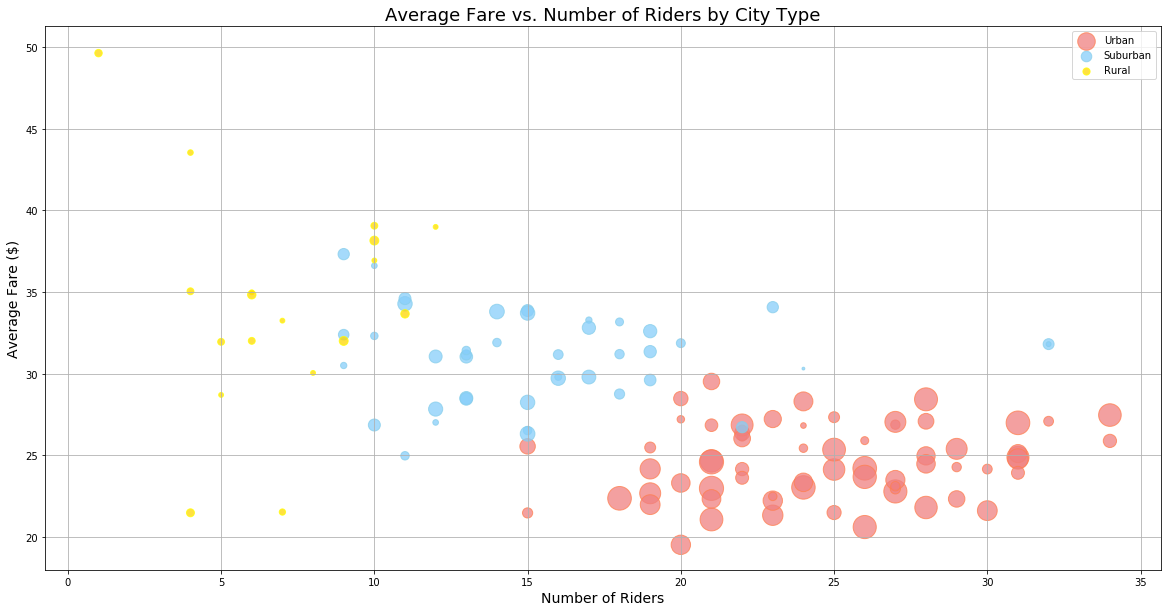

In [26]:
plt.figure(figsize=(20,10))
# multiply all driver_count by 8 to make plot more readable
plt.scatter(typeurban['ride_count'], typeurban['average_fare'], typeurban['driver_count'] * 8, c='lightcoral', label='Urban', alpha=0.75, edgecolor='coral')
plt.scatter(typesuburban['ride_count'], typesuburban['average_fare'], typesuburban['driver_count'] * 8, c='lightskyblue', label='Suburban', alpha=0.75, edgecolor='skyblue')
plt.scatter(typerural['ride_count'], typerural['average_fare'], typerural['driver_count'] * 8, c='gold', label='Rural', alpha=0.75, edgecolor='yellow')
plt.legend()
plt.xlabel('Number of Riders', size=14)
plt.ylabel('Average Fare ($)', size=14)
plt.title('Average Fare vs. Number of Riders by City Type', size=18)
plt.grid()
plt.show()


## Pie Charts

We now have three pie charts to create:

 - % of Total Fares by City Type
 - % of Total Rides by City Type
 - % of Total Drivers by City Type
 
Each requires us to group by city type, and sum:
 - Fares
 - Rides
 - Drivers
 
Lets look at our summary dataframe again:

In [19]:
first_summary.head()

,city,driver_count,type,average_fare,ride_count
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


All the information we need is there, except for total fare.

Lets derive a dataframe for total fare by city, and join it to this one:

In [20]:
totfare = pd.DataFrame(ridegroup['fare'].sum()).reset_index()
second_summary = first_summary.merge(totfare, on='city', how='outer')
second_summary.head()

,city,driver_count,type,average_fare,ride_count,fare
0,Kelseyland,63,Urban,21.806429,28,610.58
1,Nguyenbury,8,Urban,25.899615,26,673.39
2,East Douglas,12,Urban,26.169091,22,575.72
3,West Dawnfurt,34,Urban,22.330345,29,647.58
4,Rodriguezburgh,52,Urban,21.332609,23,490.65


Great, now lets clean this up by removing columns we don't need, as well as renaming the new column for intelligibility:

In [21]:
second_summary = second_summary[['type', 'fare', 'ride_count', 'driver_count']]
second_summary = second_summary.rename(columns={'fare':'total_fare'})
second_summary.head()

,type,total_fare,ride_count,driver_count
0,Urban,610.58,28,63
1,Urban,673.39,26,8
2,Urban,575.72,22,12
3,Urban,647.58,29,34
4,Urban,490.65,23,52


Now we can groupby 'type' and get the total for each column:

In [22]:
typegroup = second_summary.groupby('type')
third_summary = pd.DataFrame(typegroup[['total_fare', 'ride_count', 'driver_count']].sum()).reset_index()
third_summary

,type,total_fare,ride_count,driver_count
0,Rural,4255.09,125,104
1,Suburban,20335.69,657,638
2,Urban,40078.34,1625,2607


All pie charts will have the 'type' column as labels, and each will have one of the other columns as values:

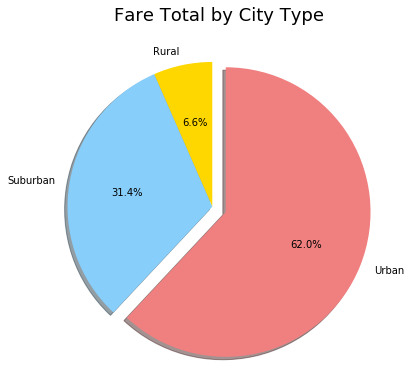

In [23]:
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.figure(figsize=(6,6))
plt.pie(third_summary['total_fare'], labels=third_summary['type'], colors=colors, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
plt.axis('equal')
plt.title('Fare Total by City Type\n', size=18)
plt.show()

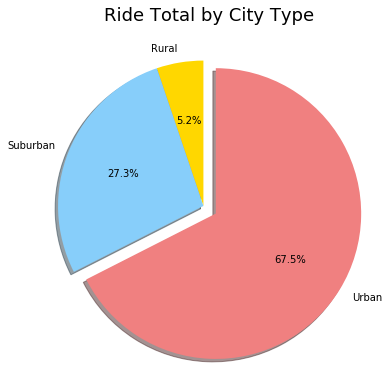

In [24]:
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.figure(figsize=(6,6))
plt.pie(third_summary['ride_count'], labels=third_summary['type'], colors=colors, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
plt.axis('equal')
plt.title('Ride Total by City Type\n', size=18)
plt.show()

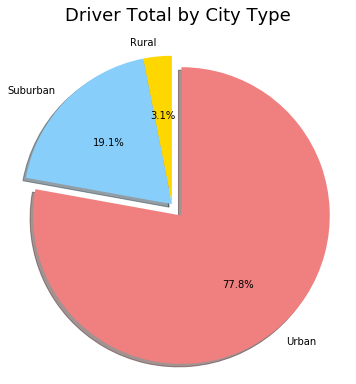

In [25]:
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.figure(figsize=(6,6))
plt.pie(third_summary['driver_count'], labels=third_summary['type'], autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=90)
plt.axis('equal')
plt.title('Driver Total by City Type\n', size=18)
plt.show()

### Conclusions:
- Urban cities have the greatest proportion of drivers, rides, and total fares.
- As the number of riders in a city goes up, the average fare diminishes.
- In rural cities, riders pay more than those in urban areas.